In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
# load data
testing_path = '/home/adeliaherlisa/Documents/s2/2018 genap/machine learning/TK Akhir/datasets/DataSplit/testing_set1.csv'
gold_standard = pd.read_csv(testing_path, header=None)
gold_standard = gold_standard.iloc[1:,-1].astype(int)

/home/adeliaherlisa/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
prediction_path_pref = '/home/adeliaherlisa/Documents/s2/2018 genap/machine learning/TK Akhir/result/test-result-eager-normal-'
prediction1 = pd.read_csv(prediction_path_pref+'1.csv', header=None)
prediction1 = prediction1.iloc[1:,-1]

prediction2 = pd.read_csv(prediction_path_pref+'2.csv', header=None)
prediction2 = prediction2.iloc[1:,-1]

prediction3 = pd.read_csv(prediction_path_pref+'3.csv', header=None)
prediction3 = prediction3.iloc[1:,-1]

prediction4 = pd.read_csv(prediction_path_pref+'4.csv', header=None)
prediction4 = prediction4.iloc[1:,-1]

prediction5 = pd.read_csv(prediction_path_pref+'5.csv', header=None)
prediction5 = prediction5.iloc[1:,-1]

In [5]:
print(str(round(accuracy_score(gold_standard, prediction1)*100, 2))
      + "\t" + str(round(precision_score(gold_standard, prediction1)*100, 2)) 
      + "\t" + str(round(recall_score(gold_standard, prediction1)*100, 2))
      + "\t" + str(round(f1_score(gold_standard, prediction1)*100, 2))
     )

print(str(round(accuracy_score(gold_standard, prediction2)*100, 2))
      + "\t" + str(round(precision_score(gold_standard, prediction2)*100, 2)) 
      + "\t" + str(round(recall_score(gold_standard, prediction2)*100, 2))
      + "\t" + str(round(f1_score(gold_standard, prediction2)*100, 2))
     )

print(str(round(accuracy_score(gold_standard, prediction3)*100, 2))
      + "\t" + str(round(precision_score(gold_standard, prediction3)*100, 2)) 
      + "\t" + str(round(recall_score(gold_standard, prediction3)*100, 2))
      + "\t" + str(round(f1_score(gold_standard, prediction3)*100, 2))
     )

print(str(round(accuracy_score(gold_standard, prediction4)*100, 2))
      + "\t" + str(round(precision_score(gold_standard, prediction4)*100, 2)) 
      + "\t" + str(round(recall_score(gold_standard, prediction4)*100, 2))
      + "\t" + str(round(f1_score(gold_standard, prediction4)*100, 2))
     )

print(str(round(accuracy_score(gold_standard, prediction5)*100, 2))
      + "\t" + str(round(precision_score(gold_standard, prediction5)*100, 2)) 
      + "\t" + str(round(recall_score(gold_standard, prediction5)*100, 2))
      + "\t" + str(round(f1_score(gold_standard, prediction5)*100, 2))
     )



95.28	88.69	87.23	87.95
94.02	79.82	93.27	86.02
93.84	79.29	93.11	85.64
94.1	80.02	93.45	86.22
93.52	77.79	94.01	85.13


In [6]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[32953   927]
 [ 1064  7269]]
Confusion matrix, without normalization
[[31915  1965]
 [  561  7772]]
Confusion matrix, without normalization
[[31853  2027]
 [  574  7759]]
Confusion matrix, without normalization
[[31936  1944]
 [  546  7787]]
Confusion matrix, without normalization
[[31643  2237]
 [  499  7834]]


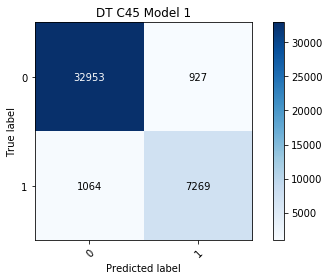

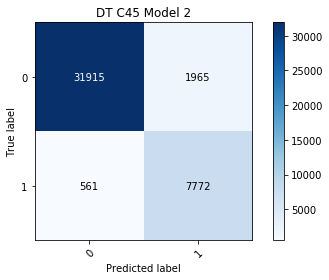

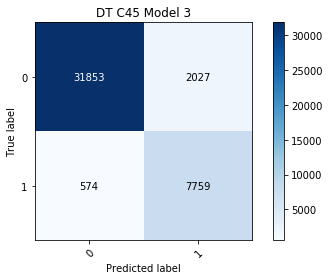

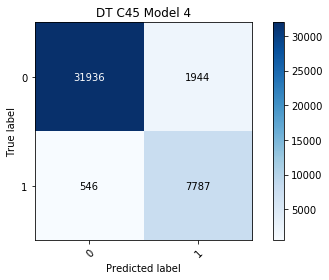

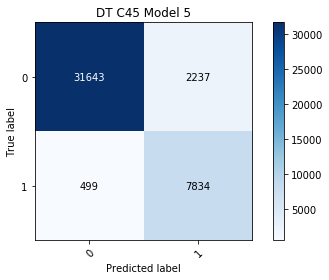

In [7]:
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction1, classes=gold_standard.unique(), normalize=False,title='DT C45 Model 1')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction2, classes=gold_standard.unique(), normalize=False,title='DT C45 Model 2')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction3, classes=gold_standard.unique(), normalize=False,title='DT C45 Model 3')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction4, classes=gold_standard.unique(), normalize=False,title='DT C45 Model 4')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction5, classes=gold_standard.unique(), normalize=False,title='DT C45 Model 5')

Normalized confusion matrix
[[0.97263872 0.02736128]
 [0.12768511 0.87231489]]
Normalized confusion matrix
[[0.94200118 0.05799882]
 [0.06732269 0.93267731]]
Normalized confusion matrix
[[0.94017119 0.05982881]
 [0.06888276 0.93111724]]
Normalized confusion matrix
[[0.94262102 0.05737898]
 [0.06552262 0.93447738]]
Normalized confusion matrix
[[0.93397285 0.06602715]
 [0.0598824  0.9401176 ]]


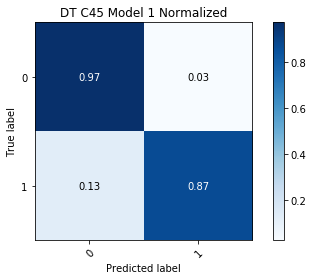

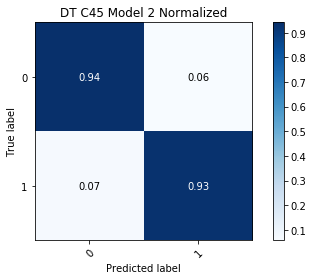

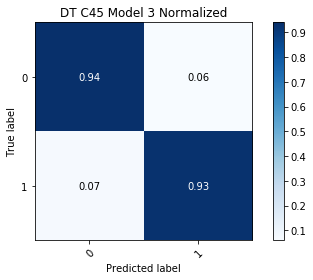

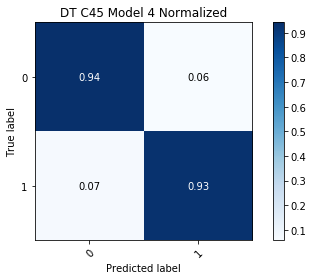

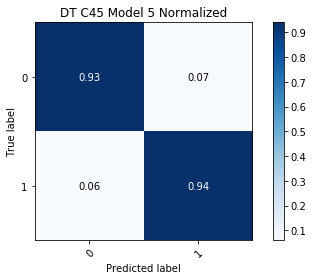

In [8]:
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction1, classes=gold_standard.unique(), normalize=True,title='DT C45 Model 1 Normalized')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction2, classes=gold_standard.unique(), normalize=True,title='DT C45 Model 2 Normalized')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction3, classes=gold_standard.unique(), normalize=True,title='DT C45 Model 3 Normalized')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction4, classes=gold_standard.unique(), normalize=True,title='DT C45 Model 4 Normalized')
plot_confusion_matrix(np.reshape(gold_standard, -1), prediction5, classes=gold_standard.unique(), normalize=True,title='DT C45 Model 5 Normalized')